In [1]:
%load_ext rpy2.ipython
import msprime
import numpy as np
from ilsmc.optimizer import trans_emiss_calc
from ilsmc.cutpoints import cutpoints_AB, cutpoints_ABC
import re
import pandas as pd
import demesdraw
import matplotlib.pyplot as plt

In [2]:
# ILS_prop = 0.30

N_AB = 50000
N_ABC = 70000
t_1 = 160000
t_2 = 40000
t_3 = t_1*5
r = 1e-8
mu = 2e-8

n_sites = 1000000

n_int_AB = 3
n_int_ABC = 3

coal_ABC = N_ABC/N_AB
coal_AB = N_AB/N_AB
t_upper = t_3-cutpoints_ABC(n_int_ABC, coal_ABC)[-2]*N_AB

In [3]:
# r = 1.4e-8

transitions, emissions, starting, hidden_states, observed_states = trans_emiss_calc(
    t_1, t_2, t_upper, 
    N_AB, N_ABC, 
    r, mu, n_int_AB, n_int_ABC)

transitions

2022-12-21 11:54:11,265	INFO worker.py:1518 -- Started a local Ray instance.


array([[9.97239638e-01, 5.89716629e-04, 5.89716629e-04, 3.54984186e-04,
        2.24231522e-07, 2.24231522e-07, 3.55003406e-04, 2.14621639e-07,
        2.14621639e-07, 1.28750864e-04, 1.64359061e-07, 1.64359061e-07,
        4.03409000e-08, 7.26136200e-08, 1.61363600e-08, 1.28769170e-04,
        1.20764478e-04, 1.20764478e-04, 4.03409000e-08, 7.26136200e-08,
        1.61363600e-08, 1.28769170e-04, 1.20764478e-04, 1.20764478e-04,
        4.03409000e-08, 7.26136200e-08, 1.61363600e-08],
       [5.89716629e-04, 9.96848011e-01, 9.81344022e-04, 2.24231522e-07,
        3.54850506e-04, 3.57911570e-07, 2.14621639e-07, 3.54865869e-04,
        3.52158741e-07, 7.36868491e-08, 2.41295321e-04, 2.24516561e-07,
        8.04496403e-05, 1.77951828e-07, 2.22740486e-08, 6.45339855e-08,
        1.20771102e-04, 1.48615977e-07, 8.04653462e-05, 7.24379855e-05,
        2.22740486e-08, 6.45339855e-08, 1.20771102e-04, 1.48615977e-07,
        8.04653462e-05, 7.24379855e-05, 2.22740486e-08],
       [5.89716629e-04

In [4]:
(2/3)*(np.exp(-t_2/(N_AB)))

0.29955264274481436

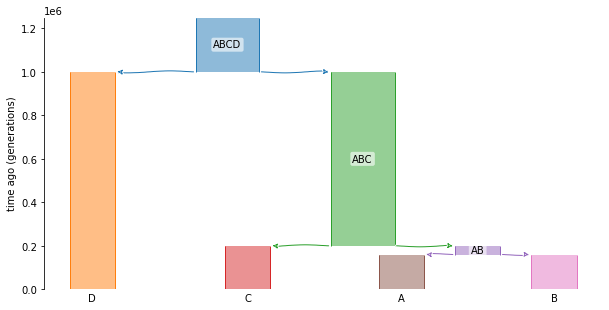

In [5]:
demography = msprime.Demography()
demography.add_population(name="A", initial_size=N_AB)
demography.add_population(name="B", initial_size=N_AB)
demography.add_population(name="C", initial_size=N_AB)
demography.add_population(name="D", initial_size=N_AB)
demography.add_population(name="AB", initial_size=N_AB)
demography.add_population(name="ABC", initial_size=N_ABC)
demography.add_population(name="ABCD", initial_size=N_ABC)
demography.add_population_split(time=t_1, derived=["A", "B"], ancestral="AB")
demography.add_population_split(time=t_1+t_2, derived=["AB", "C"], ancestral="ABC")
demography.add_population_split(time=t_1+t_2+t_3, derived=["ABC", "D"], ancestral="ABCD")

graph = msprime.Demography.to_demes(demography)
plt.rcParams["figure.figsize"] = [10.0, 5.0]
fig, ax = plt.subplots()  # use plt.rcParams["figure.figsize"]
demesdraw.tubes(graph, ax=ax, seed=1)
plt.show()

## Fragment lengths

In [6]:
tr_mut_save = pd.DataFrame(emissions).melt(ignore_index = False).reset_index()
tr_mut_save.columns = ['state', 'site', 'prob']
tr_mut_save['state'] = [hidden_states[i] for i in tr_mut_save['state']]
tr_mut_save['site'] = [observed_states[i] for i in tr_mut_save['site']]
tr_mut_save

,state,site,prob
0,"(0, 0, 0)",AAAA,0.225616
1,"(0, 0, 1)",AAAA,0.225278
2,"(0, 0, 2)",AAAA,0.224390
3,"(0, 1, 0)",AAAA,0.225514
4,"(0, 1, 1)",AAAA,0.225176
...,...,...,...
6907,"(3, 0, 1)",GGGG,0.225100
6908,"(3, 0, 2)",GGGG,0.224645
6909,"(3, 1, 1)",GGGG,0.224537
6910,"(3, 1, 2)",GGGG,0.224064


In [7]:
transitions, emissions, starting, hidden_states, observed_states = trans_emiss_calc(
    t_1, t_2, t_upper, 
    N_AB, N_ABC, 
    r, mu, n_int_AB, n_int_ABC)

In [8]:
dct_hid = {v: k for k, v in hidden_states.items()}
dct_hid

{(0, 0, 0): 0,
 (0, 0, 1): 1,
 (0, 0, 2): 2,
 (0, 1, 0): 3,
 (0, 1, 1): 4,
 (0, 1, 2): 5,
 (0, 2, 0): 6,
 (0, 2, 1): 7,
 (0, 2, 2): 8,
 (1, 0, 0): 9,
 (1, 0, 1): 10,
 (1, 0, 2): 11,
 (1, 1, 1): 12,
 (1, 1, 2): 13,
 (1, 2, 2): 14,
 (2, 0, 0): 15,
 (2, 0, 1): 16,
 (2, 0, 2): 17,
 (2, 1, 1): 18,
 (2, 1, 2): 19,
 (2, 2, 2): 20,
 (3, 0, 0): 21,
 (3, 0, 1): 22,
 (3, 0, 2): 23,
 (3, 1, 1): 24,
 (3, 1, 2): 25,
 (3, 2, 2): 26}

In [9]:
# Reference Ne (for normalization)
N_ref = N_ABC
# Speciation times (in coalescent units, i.e. number of generations / N_ref)
t_A = t_1/N_ref
t_B = t_1/N_ref
t_AB = t_2/N_ref
t_C = (t_1+t_2)/N_ref
t_upper = t_upper/N_ref
t_peak = 2*(N_ABC/N_ref)
# Recombination rates (r = rec. rate per site per generation)
rho_A = 2*N_ref*r
rho_B = 2*N_ref*r
rho_AB = 2*N_ref*r
rho_C = 2*N_ref*r
rho_ABC = 2*N_ref*r
# Coalescent rates
coal_A = N_ref/N_AB
coal_B = N_ref/N_AB
coal_AB = N_ref/N_AB
coal_C = N_ref/N_AB
coal_ABC = N_ref/N_ABC
# Mutation rates (mu = mut. rate per site per generation)
mu_ = mu*(4/3) # For Jukes-Cantor model
mu_A = 2*N_ref*mu_
mu_B = 2*N_ref*mu_
mu_C = 2*N_ref*mu_
mu_D = 2*N_ref*mu_
mu_AB = 2*N_ref*mu_
mu_ABC = 2*N_ref*mu_

cut_AB = t_1+cutpoints_AB(n_int_AB, t_AB, coal_AB)*N_ABC
cut_ABC = t_1+t_2+cutpoints_ABC(n_int_ABC, coal_ABC)*N_ABC

### msprime simulations

In [10]:
ts = msprime.sim_ancestry(
    {"A": 1, "B": 1, "C": 1, 
     "D": 1
    }, 
    demography=demography, 
    recombination_rate=r*2,
    sequence_length=n_sites,
    ploidy=1, 
    random_seed=1970
)
# ts.draw_svg()



In [11]:
left_lst = []
right_lst = []
tree_state = []
t_AB_vec = []
t_ABC_vec = []
# For each tree in the sample
for t in ts.trees():
    # Append start coordinate
    left_lst.append(t.interval.left)
    # Append end coordinate
    right_lst.append(t.interval.right-1)
    # Get all non-zero coalescent times
    ntimes = [ts.nodes()[n].time for n in t.nodes() if ts.nodes()[n].time!=0]
    ntimes = sorted(ntimes)
    # Get time of the first event
    mint = ntimes[0]
    mint2 = ntimes[1]
    # Find topology
    find_re = re.findall("n\d,n\d", t.as_newick(include_branch_lengths=False))[0]
    # Sort species within topology
    find_re = sorted(find_re.split(','))
    # If V0 or V1
    if find_re == ['n0', 'n1']:
        # If the time of the first coalescent is larger than the deepest speciation event
        if mint>=(t_1+t_2):
            state = (1, (mint>cut_ABC).sum()-1, (mint2>cut_ABC).sum()-1)
            # Append V1 state
        else:
            state = (0, (mint>cut_AB).sum()-1, (mint2>cut_ABC).sum()-1)
            # Append V0 state
    # If V2
    elif find_re == ['n0', 'n2']:
        state = (2, (mint>cut_ABC).sum()-1, (mint2>cut_ABC).sum()-1)
    # If V3
    elif find_re == ['n1', 'n2']:
        state = (3, (mint>cut_ABC).sum()-1, (mint2>cut_ABC).sum()-1)
    else:
        state = (4, (mint>cut_ABC).sum()-1, (mint2>cut_ABC).sum()-1)
    tree_state.append(state)   
    t_AB_vec.append(mint)
    t_ABC_vec.append(mint2)
        
len_lst = (np.array(right_lst)-np.array(left_lst)+1)
# print((((np.array(tree_state)==2)*len_lst).sum()+((np.array(tree_state)==3)*len_lst).sum())/n_sites)

dat_sim = pd.DataFrame({'state':[dct_hid[i] for i in tree_state], 'len':len_lst})
# dat_sim = pd.DataFrame({'state':tree_state, 'len':len_lst})
dat_sim['group'] = (dat_sim.state != dat_sim.state.shift()).cumsum()
dat_sim = dat_sim.groupby(['group', 'state']).sum().reset_index()
dat_sim.groupby('state').agg({'len':['mean', 'median', 'std', 'size']})

len                        
             mean median         std size
state                                    
0      389.017857  257.5  422.401283  168
1      293.182927  196.5  330.298921  164
2      302.373057  246.0  280.651225  193
3      369.177515  264.0  393.777166  169
4      282.142077  179.0  292.193018  183
5      307.275510  198.0  312.828446  196
6      360.800000  293.0  337.344527  155
7      304.596774  221.0  287.522472  186
8      290.692308  194.0  298.674801  195
9      279.904110  216.0  254.120497   73
10     315.085938  187.5  330.435695  128
11     291.417582  217.0  279.926394  182
12     261.261905  170.0  261.107964   42
13     240.217742  159.5  241.406231  124
14     156.393939   75.0  182.747596   33
15     302.191919  171.0  340.231574   99
16     246.844156  171.5  233.527346  154
17     269.172619  178.5  285.195489  168
18     181.465517  127.0  164.258805   58
19     200.685039  153.0  169.240352  127
20     152.486486  116.0  139.053471   37
21     344.690476  199.5  429.036999   84
22     299.554054  233.0  274.946359  148
23     287.944444  200.5  263.259091  180
24     217.900000  156.5  223.992108   60
25     239.436364  178.5  208.343644  110
26     156.472222   99.5  146.357778   36

In [12]:
new_df = pd.DataFrame()
new_df['from'] = dat_sim['state']
new_df['to'] = dat_sim['state']
new_df['n'] = dat_sim['len']

new_df_2 = pd.DataFrame()
new_df_2['from'] = dat_sim['state']
new_df_2['to'] = dat_sim['state'].shift(-1)
new_df_2 = new_df_2.dropna()
new_df_2['to'] = new_df_2['to'].astype(np.int64)
new_df_2['n'] = 1

new_df_tot = pd.concat([new_df, new_df_2])
new_df_tot = new_df_tot.groupby(['from', 'to']).sum().reset_index()
# # new_df_tot['n'] = new_df_tot['n'] / new_df_tot.groupby('from')['n'].transform('sum')
new_df_tot_save = new_df_tot.copy()
new_df_tot['n'] = new_df_tot['n'] / new_df_tot['n'].sum()

In [13]:
new_df_tot_save['from'] = [hidden_states[i] for i in new_df_tot_save['from']]
new_df_tot_save['to'] = [hidden_states[i] for i in new_df_tot_save['to']]
new_df_tot_save

,from,to,n
0,"(0, 0, 0)","(0, 0, 0)",65355.0
1,"(0, 0, 0)","(0, 0, 1)",26.0
2,"(0, 0, 0)","(0, 0, 2)",43.0
3,"(0, 0, 0)","(0, 1, 0)",18.0
4,"(0, 0, 0)","(0, 2, 0)",19.0
...,...,...,...
378,"(3, 2, 2)","(2, 1, 2)",6.0
379,"(3, 2, 2)","(2, 2, 2)",2.0
380,"(3, 2, 2)","(3, 0, 2)",7.0
381,"(3, 2, 2)","(3, 1, 2)",4.0


In [14]:
from ilsmc.get_joint_prob_mat import get_joint_prob_mat



tr = get_joint_prob_mat(
    t_A,    t_B,    t_AB,    t_C, 
    rho_A,  rho_B,  rho_AB,  rho_C,  rho_ABC, 
    coal_A, coal_B, coal_AB, coal_C, coal_ABC,
    n_int_AB, n_int_ABC)

In [15]:
tr_dat_save = pd.DataFrame(tr)
tr_dat_save.columns = ['from', 'to', 'n']
tr_dat_save

,from,to,n
0,"(0, 0, 0)","(0, 0, 0)",0.061017
1,"(0, 0, 0)","(0, 0, 1)",0.000036
2,"(0, 0, 1)","(0, 0, 0)",0.000036
3,"(0, 0, 0)","(0, 0, 2)",0.000036
4,"(0, 0, 2)","(0, 0, 0)",0.000036
...,...,...,...
724,"(2, 2, 2)","(2, 2, 2)",0.005514
725,"(2, 2, 2)","(3, 2, 2)",0.000003
726,"(3, 2, 2)","(1, 2, 2)",0.000003
727,"(3, 2, 2)","(2, 2, 2)",0.000003


In [16]:
tr_dat = pd.DataFrame(tr)
tr_dat[0] = [dct_hid[i] for i in tr_dat[0]]
tr_dat[1] = [dct_hid[i] for i in tr_dat[1]]
# tr_dat[2] = tr_dat[2]*n_sites

### TRAILS simulations

In [17]:
from numba import njit

@njit
def rand_choice_nb(arr, prob):
    """
    :param arr: A 1D numpy array of values to sample from.
    :param prob: A 1D numpy array of probabilities for the given samples.
    :return: A random sample from the given array with a given probability.
    """
    return arr[np.searchsorted(np.cumsum(prob), np.random.random(), side="right")]

@njit
def simulate(n_sim, transitions, emissions, starting, hid, obs, seed):
    np.random.seed(seed)
    H = np.zeros(n_sim, dtype = np.int16)
    E = np.zeros(n_sim, dtype = np.int16)
    h = rand_choice_nb(
        list(range(hid)),
        starting
    )
    H[0] = h
    e = rand_choice_nb(
        list(range(obs)),
        emissions[H[0]]
    )
    E[0] = e

    for i in range(1, n_sim):
        h = rand_choice_nb(
            list(range(hid)),
            transitions[H[i-1]]
        )
        e = rand_choice_nb(
            list(range(obs)),
            emissions[h]
        )
        E[i] = e
        H[i] = h
    return E, H

In [18]:
# E, H = simulate(n_sites, transitions, emissions, starting, len(hidden_states), len(observed_states), 10)

In [19]:
dct = {v: k for k, v in observed_states.items()}

In [20]:
# import pandas as pd
# 
# dat = pd.DataFrame({'state':H})
# dat['group'] = (dat.state != dat.state.shift()).cumsum()
# dat.groupby(['state', 'group']).size().to_frame().groupby('state').agg(['mean', 'median', 'std', 'size'])

## Mutational patterns

### msprime simulations

In [21]:
mutated_ts = msprime.sim_mutations(ts, rate=mu*2, random_seed=900)
# mutated_ts.draw_svg()

nochange_lst = [dct['AAAA'], dct['CCCC'], dct['TTTT'], dct['GGGG']]
np.random.seed(10) ; sim_genome = np.random.choice(nochange_lst, n_sites)

mut_lst = []
mut_loc = []
for variant in mutated_ts.variants():
    mut_loc.append(variant.site.position)
    # print(variant.site.mutations[0].node)
    # print(variant.site.mutations[0].time)
    mut_lst.append(''.join([variant.alleles[i] for i in variant.genotypes]))
# [dct[i] for i in mut_lst]

for i in range(len(mut_loc)):
    sim_genome[int(mut_loc[i])] = dct[mut_lst[i]]
sim_genome

array([ 85,  85,   0, ..., 170,   0, 170])

Total number of mutations:

In [22]:
len(mut_lst)/n_sites

0.099679

In [23]:
df = dat_sim.reset_index()
df = df.reindex(df.index.repeat(df.len))
df

,index,group,state,len
0,0,1,4,598.0
0,0,1,4,598.0
0,0,1,4,598.0
0,0,1,4,598.0
0,0,1,4,598.0
...,...,...,...,...
3451,3451,3452,21,174.0
3451,3451,3452,21,174.0
3451,3451,3452,21,174.0
3451,3451,3452,21,174.0


In [24]:
df = dat_sim.reset_index()
df = df.reindex(df.index.repeat(df.len))
df['site'] = sim_genome
df = df.groupby(['state', 'site']).size().reset_index()
df[0] = df[0] / df.groupby('state')[0].transform('sum')
df_save = df.copy()
df_save['state'] = [hidden_states[i] for i in df_save['state']]
df_save['site'] = [observed_states[i] for i in df_save['site']]
df_save.columns = ['state', 'site', 'prob']
df = df.pivot('state', 'site', 0)
df

site,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
state,,,,,,,,,,,,,,,,,,,,,
0,0.225721,0.006075,0.005860,0.005952,0.000750,0.000122,0.000046,0.000031,0.000612,0.000015,...,0.000031,0.000643,NaN,0.000031,0.000122,0.000551,0.006075,0.005417,0.005891,0.227802
1,0.226925,0.006427,0.006260,0.005470,0.000811,0.000229,0.000042,0.000021,0.000894,0.000042,...,0.000042,0.000977,0.000062,0.000104,0.000229,0.000770,0.005761,0.005803,0.005865,0.225469
2,0.223774,0.005535,0.005603,0.005552,0.000977,0.000514,0.000034,0.000034,0.001131,0.000034,...,0.000069,0.001182,0.000017,NaN,0.000428,0.000960,0.005518,0.005792,0.005603,0.224528
3,0.226972,0.006411,0.005674,0.006139,0.000577,0.000048,0.000032,0.000016,0.000609,0.000032,...,0.000032,0.000593,0.000048,0.000016,0.000192,0.000817,0.005337,0.006203,0.005914,0.224632
4,0.227553,0.006217,0.005868,0.005617,0.000562,0.000155,NaN,0.000058,0.000891,0.000039,...,0.000019,0.000852,0.000019,NaN,0.000252,0.000620,0.005733,0.005849,0.005617,0.225810
5,0.222396,0.005928,0.005612,0.004832,0.001195,0.000448,0.000066,0.000050,0.001212,0.000017,...,NaN,0.001179,0.000050,0.000050,0.000465,0.001179,0.005513,0.005214,0.005264,0.226945
6,0.227076,0.006098,0.006366,0.006008,0.000554,0.000072,NaN,0.000018,0.000697,0.000054,...,NaN,0.000519,NaN,0.000054,0.000089,0.000840,0.006098,0.006026,0.005525,0.222731
7,0.224976,0.005860,0.005313,0.005701,0.000688,0.000247,NaN,0.000035,0.000671,0.000053,...,0.000071,0.000830,0.000053,0.000018,0.000194,0.000530,0.005631,0.005525,0.006160,0.226405
8,0.223181,0.005522,0.005575,0.005416,0.001323,0.000670,0.000071,0.000035,0.001076,0.000053,...,0.000018,0.001094,0.000035,0.000053,0.000476,0.001041,0.005098,0.005698,0.006122,0.225686


In [25]:
df_save

,state,site,prob
0,"(0, 0, 0)",AAAA,0.225721
1,"(0, 0, 0)",AAAC,0.006075
2,"(0, 0, 0)",AAAT,0.005860
3,"(0, 0, 0)",AAAG,0.005952
4,"(0, 0, 0)",AACA,0.000750
...,...,...,...
3050,"(3, 2, 2)",GGTG,0.000710
3051,"(3, 2, 2)",GGGA,0.004971
3052,"(3, 2, 2)",GGGC,0.004793
3053,"(3, 2, 2)",GGGT,0.005503


### TRAILS simulations

Total number of mutations

In [26]:
# (n_sites-np.isin(E, nochange_lst).sum())/n_sites

In [27]:
# pd.DataFrame(emissions)

In [28]:
df/pd.DataFrame(emissions)

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
state,,,,,,,,,,,,,,,,,,,,,
0,1.000464,0.982558,0.947908,0.962758,1.158264,0.745975,2.080410,1.386940,0.945522,0.693470,...,1.386940,0.992798,NaN,1.386940,0.745975,0.850970,0.982558,0.876134,0.952858,1.009688
1,1.007308,1.060861,1.033396,0.902934,1.067356,0.826759,1.484937,0.742468,1.176829,1.484937,...,1.484937,1.286301,2.227405,3.712342,0.826759,1.012620,0.950999,0.957865,0.968165,1.000846
2,0.997255,0.965635,0.977594,0.968625,0.924837,0.897315,0.797905,0.797905,1.070864,0.797905,...,1.595811,1.119540,0.398953,NaN,0.747763,0.908612,0.962646,1.010479,0.977594,1.000615
3,1.006464,1.037500,0.918188,0.993407,0.893096,0.370005,1.524907,0.762454,0.942712,1.524907,...,1.524907,0.917904,2.287361,0.762454,1.480021,1.265219,0.863719,1.003782,0.957094,0.996087
4,1.010553,1.026772,0.969196,0.927613,0.740338,0.638826,NaN,2.154617,1.174330,1.436411,...,0.718206,1.123272,0.718206,NaN,1.038092,0.816925,0.946805,0.965997,0.927613,1.002812
5,0.991562,1.034677,0.979610,0.843392,1.133435,0.832309,1.585034,1.188776,1.149178,0.396259,...,NaN,1.117693,1.188776,1.188776,0.863136,1.117693,0.962221,0.910052,0.918747,1.011847
6,1.007519,0.987350,1.030782,0.972873,0.860115,0.834998,NaN,0.909150,1.082080,2.727451,...,NaN,0.804624,NaN,2.727451,1.043747,1.304046,0.987350,0.975768,0.894696,0.988239
7,0.999697,0.968400,0.877977,0.942148,0.909324,1.246744,NaN,1.378348,0.886008,2.067522,...,2.756696,1.095852,2.067522,0.689174,0.979585,0.699480,0.930480,0.912979,1.017986,1.006050
8,0.995649,0.964426,0.973670,0.945939,1.256510,1.356532,1.740602,0.870301,1.021962,1.305452,...,0.435151,1.038715,0.870301,1.305452,0.963851,0.988455,0.890477,0.995239,1.069188,1.006825


## Inference

In [29]:
from ilsmc.optimizer import viterbi
vit = viterbi(transitions, emissions, starting, sim_genome)

In [30]:
hid = [str(x) for x in hidden_states.values()]
hid[0:5]


dat_sim = pd.DataFrame({'state':tree_state, 'len':len_lst})
dat_sim['group'] = (dat_sim.state != dat_sim.state.shift()).cumsum()
dat_sim = dat_sim.groupby(['group', 'state']).sum()
dat_sim.groupby('state').agg(['mean', 'median', 'std', 'size'])

len                        
                 mean median         std size
state                                        
(0, 0, 0)  389.017857  257.5  422.401283  168
(0, 0, 1)  293.182927  196.5  330.298921  164
(0, 0, 2)  302.373057  246.0  280.651225  193
(0, 1, 0)  369.177515  264.0  393.777166  169
(0, 1, 1)  282.142077  179.0  292.193018  183
(0, 1, 2)  307.275510  198.0  312.828446  196
(0, 2, 0)  360.800000  293.0  337.344527  155
(0, 2, 1)  304.596774  221.0  287.522472  186
(0, 2, 2)  290.692308  194.0  298.674801  195
(1, 0, 0)  279.904110  216.0  254.120497   73
(1, 0, 1)  315.085938  187.5  330.435695  128
(1, 0, 2)  291.417582  217.0  279.926394  182
(1, 1, 1)  261.261905  170.0  261.107964   42
(1, 1, 2)  240.217742  159.5  241.406231  124
(1, 2, 2)  156.393939   75.0  182.747596   33
(2, 0, 0)  302.191919  171.0  340.231574   99
(2, 0, 1)  246.844156  171.5  233.527346  154
(2, 0, 2)  269.172619  178.5  285.195489  168
(2, 1, 1)  181.465517  127.0  164.258805   58
(2, 1, 2)  200.685039  153.0  169.240352  127
(2, 2, 2)  152.486486  116.0  139.053471   37
(3, 0, 0)  344.690476  199.5  429.036999   84
(3, 0, 1)  299.554054  233.0  274.946359  148
(3, 0, 2)  287.944444  200.5  263.259091  180
(3, 1, 1)  217.900000  156.5  223.992108   60
(3, 1, 2)  239.436364  178.5  208.343644  110
(3, 2, 2)  156.472222   99.5  146.357778   36

In [31]:
vit_sim = pd.DataFrame({'state':vit})
vit_sim['group'] = (vit_sim.state != vit_sim.state.shift()).cumsum()
vit_sim_2 = vit_sim.groupby(['state']).size().reset_index()
vit_sim_2['state'] = [hidden_states[i] for i in vit_sim_2['state']]
vit_sim_2

,state,0
0,"(0, 0, 0)",99822
1,"(0, 0, 1)",8658
2,"(0, 0, 2)",7179
3,"(0, 1, 0)",135257
4,"(0, 1, 1)",7989
5,"(0, 1, 2)",47365
6,"(0, 2, 0)",253274
7,"(0, 2, 1)",236455
8,"(0, 2, 2)",61059
9,"(1, 0, 2)",30013


In [32]:
from ilsmc.optimizer import post_prob
post = post_prob(transitions, emissions, starting, sim_genome)

In [33]:
post2 = pd.DataFrame(post)
post2 = post2[post2.index < 100000]
post2['pos'] = np.array(list(range(len(post2))))+1
post2 = post2.melt('pos')
hid_tmp = [hidden_states[x] for x in post2['variable']]
post2['V'] = [x[0] for x in hid_tmp]
post2['t1'] = [x[1] for x in hid_tmp]
post2['t2'] = [x[2] for x in hid_tmp]
post2[['pos', 'value', 'V', 't1', 't2']].to_csv('post2.csv', index = False)

In [34]:
post2

,pos,variable,value,V,t1,t2
0,1,0,0.160702,0,0,0
1,2,0,0.160887,0,0,0
2,3,0,0.161070,0,0,0
3,4,0,0.161253,0,0,0
4,5,0,0.161435,0,0,0
...,...,...,...,...,...,...
2699995,99996,26,0.000513,3,2,2
2699996,99997,26,0.000516,3,2,2
2699997,99998,26,0.000519,3,2,2
2699998,99999,26,0.000521,3,2,2


In [35]:
tree_state_r = [dct_hid[i] for i in tree_state]

In [36]:
%%R -i tree_state_r -i hid -i len_lst

library(tidyverse)
library(ggthemes)

hid_st <- unlist(hid)

lo = 1
up = 100000

y_post <- read_csv('post2.csv') %>%
    as_tibble() %>%
    mutate(
        is_V0 = V == 0
    )

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Rows: 2700000 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): pos, value, V, t1, t2

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [37]:
%%R 

y_true <- tibble(
    name = hid_st[unlist(tree_state_r)+1],
    len = unlist(len_lst)
) %>% 
    rowwise() %>%
    summarize(
        name = rep(name, len)
    ) %>%
    mutate(
        pos = 1:n()
    ) %>%
    filter(between(pos, lo, up)) %>%
    mutate(
        name = str_remove_all(name, ' '),
        name = str_remove_all(name, '\\)'),
        name = str_remove_all(name, '\\(')
    ) %>%
    separate(
        name,
        c('V', 't1', 't2'),
        ','
    ) %>%
    mutate_all(as.integer) %>%
    mutate(
        is_V0 = V == 0
    )

In [38]:
%%R

v_post_plt <- y_post %>% 
    filter(between(pos, lo, up)) %>%
    group_by(pos, V) %>% 
    summarize(value = sum(value)) %>% 
    ggplot() +
    geom_tile(aes(pos, V, fill = value),
             color = NA) +
    theme_few() +
    scale_fill_viridis_c(name = 'Posterior\nprobability') +
    scale_y_continuous(
        breaks = c(0, 1, 2, 3), 
        labels = c('V0', 'V1', 'V2', 'V3')
    ) +
    ylab('State') +
    xlab('Position')

`summarise()` has grouped output by 'pos'. You can override using the `.groups` argument.


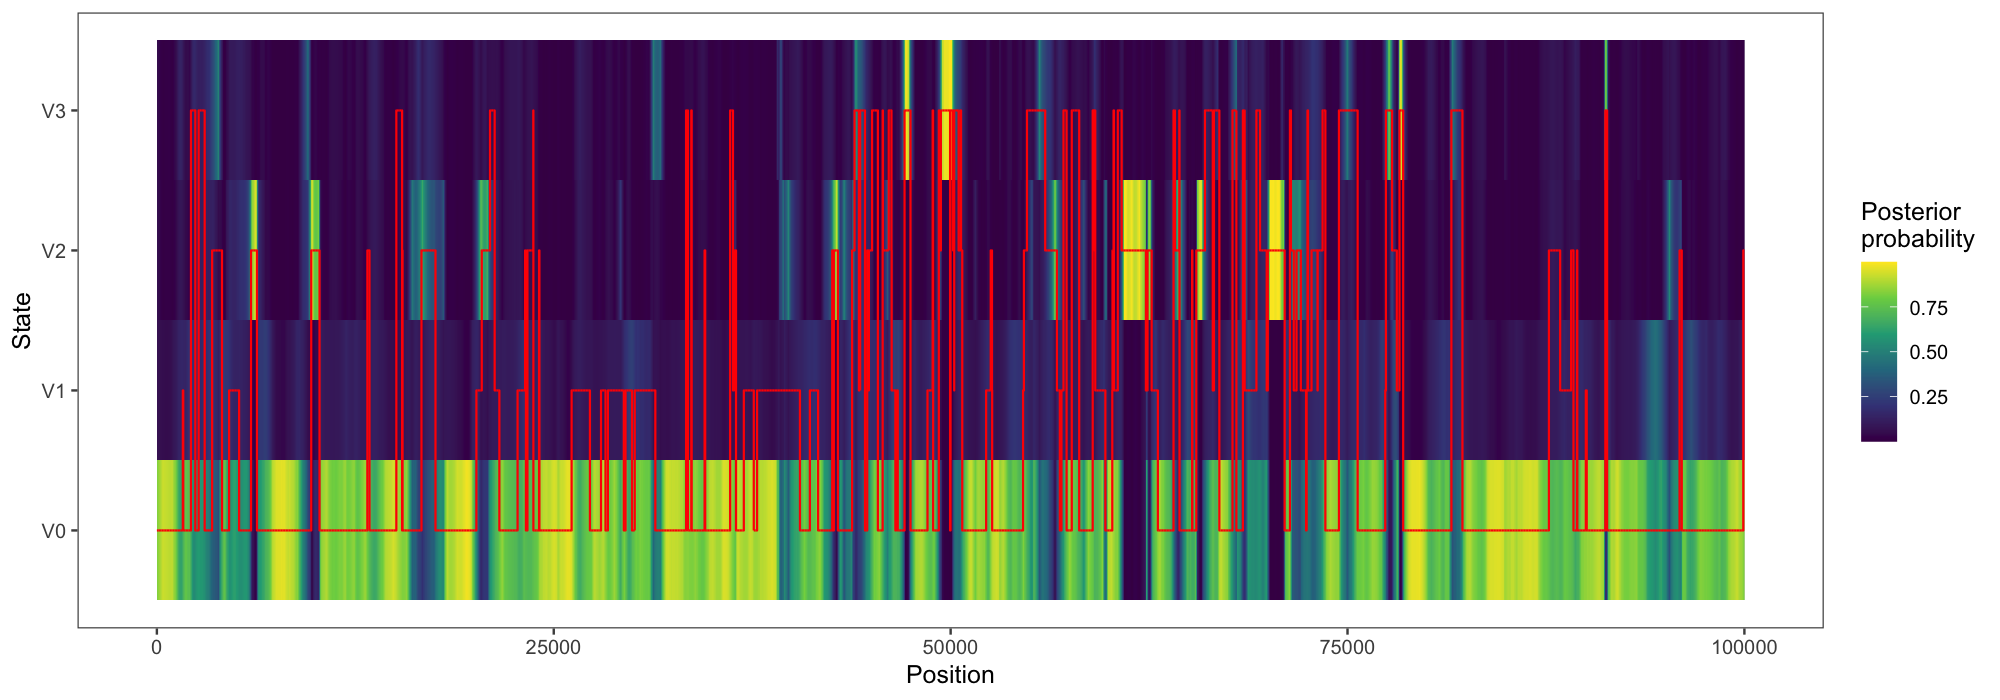

In [39]:
%%R -w 2000 -h 700 -r 150
    
v_post_plt +
    geom_line(aes(pos, V), color = 'red', data = y_true)

In [40]:
%%R 

t1_post_plt <- y_post %>% 
    filter(between(pos, lo, up)) %>%
    group_by(pos, is_V0, t1) %>% 
    summarize(value = sum(value)) %>% 
    ggplot() +
    geom_tile(aes(pos, t1+(!is_V0)*(n_int_AB+0.1), fill = value),
             color = NA) +
    theme_few() +
    scale_fill_viridis_c(name = 'Posterior\nprobability') +
    ylab('State') +
    xlab('Position')

`summarise()` has grouped output by 'pos', 'is_V0'. You can override using the `.groups` argument.


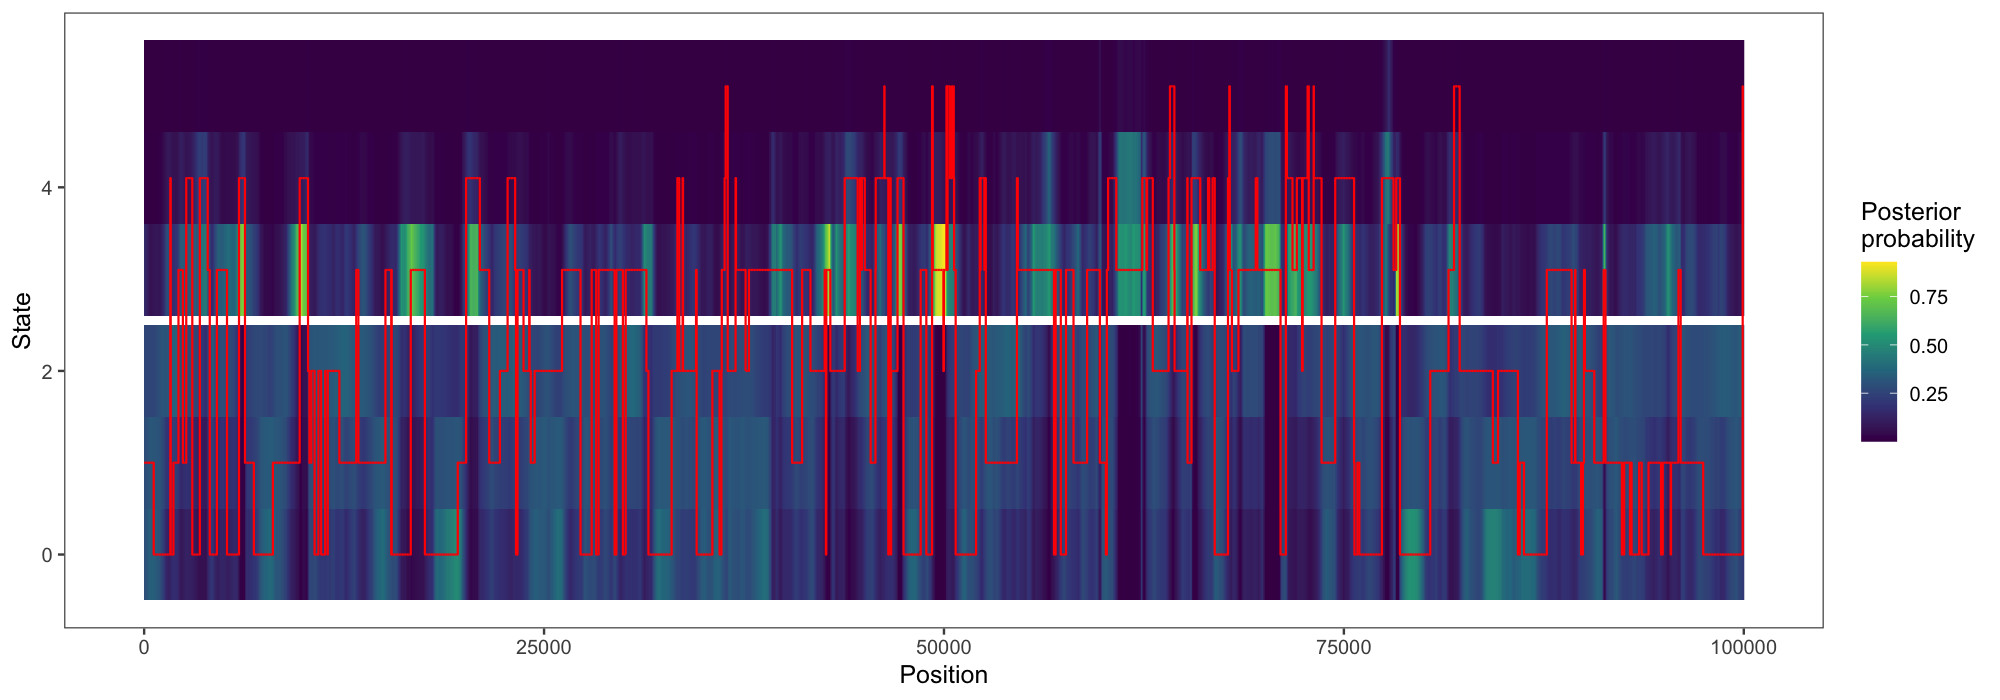

In [41]:
%%R -w 2000 -h 700 -r 150 -i n_int_AB

t1_post_plt +
    geom_line(aes(pos, t1+(!is_V0)*(n_int_AB+0.1)), color = 'red', data = y_true) 

In [42]:
%%R -w 2000 -h 700 -r 150

t2_post_plt <- y_post %>% 
    filter(between(pos, lo, up)) %>%
    group_by(pos, t2) %>% 
    summarize(value = sum(value)) %>% 
    ggplot() +
    geom_tile(aes(pos, t2, fill = value),
             color = NA) +
    theme_few() +
    scale_fill_viridis_c(name = 'Posterior\nprobability') +
    ylab('State') +
    xlab('Position')

`summarise()` has grouped output by 'pos'. You can override using the `.groups` argument.


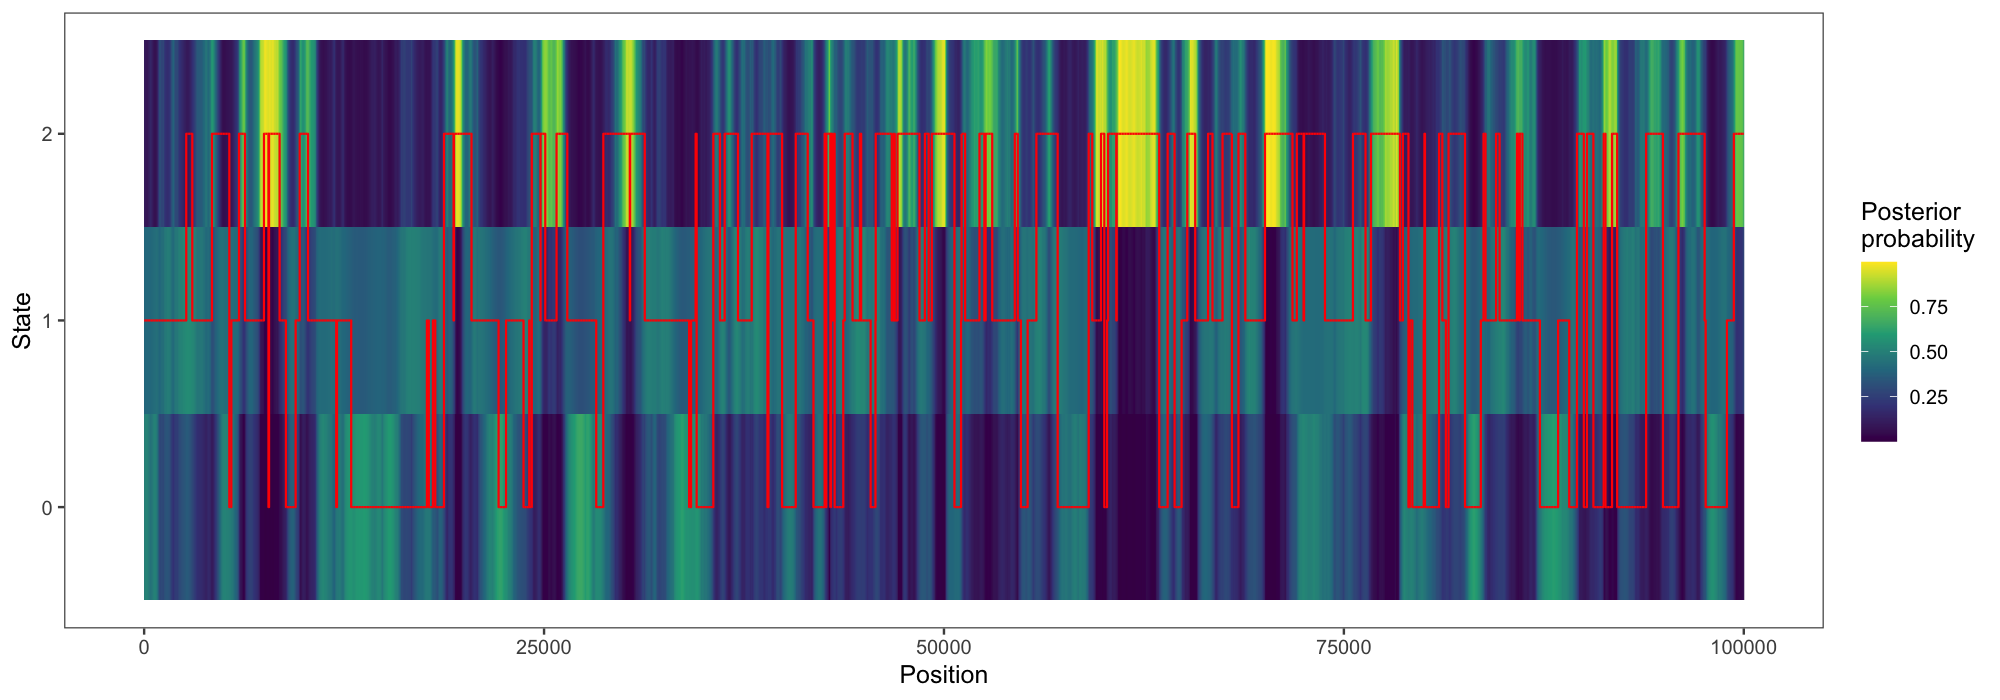

In [43]:
%%R -w 2000 -h 700 -r 150

(t2_post_plt +
    geom_line(aes(pos, t2), color = 'red', data = y_true) ) 

In [252]:
cut_ABC

array([199925.38481089, 234582.74383889,             inf])

In [224]:
len_data = pd.DataFrame({'state':[dct_hid[i] for i in tree_state], 'len':len_lst, 't1':t_AB_vec, 't2':t_ABC_vec})

In [286]:
%%R -i cut_ABC -i cut_AB

NULL

NULL


In [276]:
%%R -i len_data -w 2000 -h 700 -r 150

plt_lol <- as_tibble(len_data) %>%
    mutate(
        xmax = cumsum(len),
        len = lag(len, 1, 0),
        xmin = cumsum(len)
    ) %>% 
    filter(xmin < up) %>%
    ggplot() +
    geom_segment(aes(x=xmin, xend=xmax, y=t1, yend=t1, color = 't1')) +
    geom_segment(aes(x=xmin, xend=xmax, y=t2, yend=t2, color = 't2')) +
    geom_hline(aes(yintercept=x), data=tibble(x=cut_AB[-3]), color = 'black') +
    geom_hline(aes(yintercept=x), data=tibble(x=cut_ABC), color = 'black', linetype = 2) +
    theme_few() 
    

In [231]:
from ilsmc.optimizer import viterbi
vit = viterbi(transitions, emissions, starting, E)

In [45]:
vit_sim = pd.DataFrame({'state':vit})
vit_sim['group'] = (vit_sim.state != vit_sim.state.shift()).cumsum()
vit_sim.groupby(['state']).size()

state
0.0      99822
1.0       8658
2.0       7179
3.0     135257
4.0       7989
5.0      47365
6.0     253274
7.0     236455
8.0      61059
11.0     30013
13.0      6220
15.0      9297
16.0      2304
17.0     11799
19.0     17650
22.0      5450
23.0     48571
25.0     10694
26.0       944
dtype: int64

In [1]:
%load_ext rpy2.ipython
import msprime
import numpy as np
from ilsmc.optimizer import trans_emiss_calc
from ilsmc.cutpoints import cutpoints_ABC
import re

In [2]:
t_1 = 2e5
t_2 = 3e4
t_3 = 5e5 
N_AB = 50000
N_ABC = 40000
r = 2e-9
mu = 2e-8

n_int_AB = 1
n_int_ABC = 1

coal_ABC = N_ABC/N_AB
t_upper = t_3-cutpoints_ABC(n_int_ABC, coal_ABC)[-2]*N_AB

transitions, emissions, starting, hidden_states, observed_states = trans_emiss_calc(
    t_1, t_2, t_upper, 
    N_AB, N_ABC, 
    r, mu, n_int_AB, n_int_ABC)

In [3]:
dct = {v: k for k, v in observed_states.items()}

In [4]:
demography = msprime.Demography()
demography.add_population(name="A", initial_size=N_AB)
demography.add_population(name="B", initial_size=N_AB)
demography.add_population(name="C", initial_size=N_AB)
demography.add_population(name="D", initial_size=N_AB)
demography.add_population(name="AB", initial_size=N_AB)
demography.add_population(name="ABC", initial_size=N_ABC)
demography.add_population(name="ABCD", initial_size=N_ABC)
demography.add_population_split(time=t_1, derived=["A", "B"], ancestral="AB")
demography.add_population_split(time=t_1+t_2, derived=["AB", "C"], ancestral="ABC")
demography.add_population_split(time=t_1+t_2+t_3, derived=["ABC", "D"], ancestral="ABCD")
demography

Demography(populations=[Population(initial_size=50000, growth_rate=0, name='A', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=0), Population(initial_size=50000, growth_rate=0, name='B', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=1), Population(initial_size=50000, growth_rate=0, name='C', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=2), Population(initial_size=50000, growth_rate=0, name='D', description='', extra_metadata={}, default_sampling_time=None, initially_active=None, id=3), Population(initial_size=50000, growth_rate=0, name='AB', description='', extra_metadata={}, default_sampling_time=200000.0, initially_active=False, id=4), Population(initial_size=40000, growth_rate=0, name='ABC', description='', extra_metadata={}, default_sampling_time=230000.0, initially_active=False, id=5), Population(initial_size=40000, growth_rate=0, name='ABCD', description='', extra_metadata={}, default_sampling_time=730000.0, initially_active=False, id=6)], events=[PopulationSplit(time=200000.0, derived=['A', 'B'], ancestral='AB'), PopulationSplit(time=230000.0, derived=['AB', 'C'], ancestral='ABC'), PopulationSplit(time=730000.0, derived=['ABC', 'D'], ancestral='ABCD')], migration_matrix=array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]]))

In [57]:
r

2e-09

In [135]:
n_sites = 10000000

ts = msprime.sim_ancestry(
    {"A": 1, "B": 1, "C": 1, "D": 1}, 
    demography=demography, 
    recombination_rate=r,
    sequence_length=n_sites,
    ploidy=1, 
    # random_seed=191
)
# ts.draw_svg()






left_lst = []
right_lst = []
tree_state = []
for t in ts.trees():
    left_lst.append(t.interval.left)
    right_lst.append(t.interval.right-1)
    ntimes = [ts.nodes()[n].time for n in t.nodes() if ts.nodes()[n].time!=0]
    mint = min(ntimes)
    find_re = re.findall("n\d,n\d", t.as_newick(include_branch_lengths=False))[0]
    find_re = sorted(find_re.split(','))
    if find_re == ['n0', 'n1']:
        if mint>t_1+t_2:
            tree_state.append(1)
        else:
            tree_state.append(0)
    elif find_re == ['n0', 'n2']:
        tree_state.append(2)
    elif find_re == ['n1', 'n2']:
        tree_state.append(3)
        
        

    
    
    
    
len_lst = (np.array(right_lst)-np.array(left_lst)+1)
(((np.array(tree_state)==2)*len_lst).sum()+((np.array(tree_state)==3)*len_lst).sum())/n_sites

# len_lst[np.array(tree_state)==0].mean()

0.3485427

In [139]:
mutated_ts = msprime.sim_mutations(ts, rate=mu*2*(3/4), random_seed=2929)
# mutated_ts.draw_svg()






np.seed = 0

nochange_lst = [dct['AAAA'], dct['CCCC'], dct['TTTT'], dct['GGGG']]
sim_genome = np.random.choice(nochange_lst, n_sites)

mut_lst = []
mut_loc = []
for variant in mutated_ts.variants():
    mut_loc.append(variant.site.position)
    # print(variant.site.mutations[0].node)
    # print(variant.site.mutations[0].time)
    mut_lst.append(''.join([variant.alleles[i] for i in variant.genotypes]))
    print(variant.alleles)
    break
# [dct[i] for i in mut_lst]

for i in range(len(mut_loc)):
    sim_genome[int(mut_loc[i])] = dct[mut_lst[i]]

('A', 'T')


In [526]:
from scipy.optimize import minimize

def opt(arg_lst, mu, t_1, t_2, t_upper, N_AB, N_ABC, n_int_AB, n_int_ABC, V):
    r = arg_lst[0]
    a, b, pi, hidden_names, observed_names = trans_emiss_calc(
        t_1, t_2, t_upper, N_AB, N_ABC, r, mu, n_int_AB, n_int_ABC
    )
    loglik = forward_loglik(a, b, pi, V)
    print(
            '{0: .5e}   {1: .5e}   {2: 3.6f}'.format(
                r, mu, loglik
            )
        )
    return -loglik


t_1 = 2e5
t_2 = 3e4
t_3 = 5e5 
N_AB = 50000
N_ABC = 40000
r = 2e-9
mu = 2e-8
# init_params = np.array([r])
# 
# b_r = (1e-11, 1e-7)
# # b_mu = (1e-11, 1e-7)
# bnds = (b_r, b_mu)
# res = minimize(
#     opt, 
#     x0 = init_params,
#     args = (mu, t_1, t_2, t_upper, N_AB, N_ABC, n_int_AB, n_int_ABC, sim_genome),
#     method = 'Nelder-Mead',
#     bounds = bnds, 
#     options = {
#         'maxiter': 3000,
#         'disp': True
#     }
# )

for i in np.linspace(2.2e-10, 2.4e-10, 10):
    opt([i], mu, t_1, t_2, t_upper, N_AB, N_ABC, n_int_AB, n_int_ABC, sim_genome)


 2.20000e-10    2.00000e-08   -17495987.653082
 2.22222e-10    2.00000e-08   -17495987.508530
 2.24444e-10    2.00000e-08   -17495987.401473
 2.26667e-10    2.00000e-08   -17495987.331162
 2.28889e-10    2.00000e-08   -17495987.296876
 2.31111e-10    2.00000e-08   -17495987.297919
 2.33333e-10    2.00000e-08   -17495987.333602
 2.35556e-10    2.00000e-08   -17495987.403280
 2.37778e-10    2.00000e-08   -17495987.506296
 2.40000e-10    2.00000e-08   -17495987.642029


0.3140198

In [535]:
from ilsmc.optimizer import viterbi
vit = viterbi(transitions, emissions, starting, sim_genome)

In [536]:
hid = [str(x) for x in hidden_states.values()]
hid[0:5]

['(0, 0, 0)', '(1, 0, 0)', '(2, 0, 0)', '(3, 0, 0)']

In [537]:
%%R -i vit -i hid

library(tidyverse)
library(ggthemes)

hid_st <- unlist(hid)

In [538]:
%%R -i left_lst -i right_lst -i tree_state

a_true = tibble(
    nst = unlist(left_lst),
    n = unlist(right_lst),
    V = unlist(tree_state)
)

In [ ]:
%%R

vit_unlist <- unlist(vit)

y_vit <- tibble(
        name = hid_st[vit_unlist+1]
    ) %>%
    mutate(
        pos = 1:n()
    ) %>%
    mutate(
        name = str_remove_all(name, ' '),
        name = str_remove_all(name, '\\)'),
        name = str_remove_all(name, '\\(')
    ) %>%
    separate(
        name,
        c('V', 't1', 't2'),
        ','
    ) %>%
    mutate_all(as.integer) %>%
    mutate(
        is_V0 = V == 0
    )
    
a_vit <- y_vit %>%
    mutate(
        Vg = data.table::rleid(V), t1g = data.table::rleid(t1), t2g = data.table::rleid(t2)
    ) %>%
    group_by(Vg, t1g, t2g) %>%
    summarize(
        n = n(),
        V = unique(V),
        t1 = unique(t1),
        t2 = unique(t2)
    ) %>% 
    ungroup() %>%
    mutate(
        n = cumsum(n),
        nst = lag(n, 1, 0)+1
    )

In [ ]:
%%R

ggplot() +
    geom_rect(
        aes(xmin = nst, xmax = n, ymin = V-0.4, ymax = V, fill = 'Viterbi'),
        data = a_vit
    ) +
    geom_rect(
        aes(xmin = nst, xmax = n, ymin = V, ymax = V+0.4, fill = 'True'),
        data = a_true
    ) +
    theme_few() +
    ylab('State') +
    xlab('Position')

In [40]:
from ilsmc.optimizer import forward_loglik
import time
start = time.time()
print(forward_loglik(transitions, emissions, starting, sim_genome))
end = time.time()
print("Elapsed = %s" % (end - start))

-17505935.541211084
Elapsed = 6.998022079467773


In [44]:
from ilsmc.optimizer import optimizer_no_mu

t_init_1 = 2e5
t_init_2 = 3e4
t_init_upper = 5e5
N_init = 45000
r_init = 2e-9
mu_init = 2e-8

res = optimizer_no_mu(t_init_1, t_init_2, t_init_upper, 
                    N_init, N_init, 
                    r_init, mu_init, 
                    1, 1, sim_genome, 'optim_1', True)

   0    2.00000e+05    3.00000e+04    5.00000e+05    4.50000e+04    4.50000e+04    2.00000e-09   -17515130.253549    5.988477
   1    2.10000e+05    3.00000e+04    5.00000e+05    4.50000e+04    4.50000e+04    2.00000e-09   -17515780.402004    11.780781
   2    2.00000e+05    3.15000e+04    5.00000e+05    4.50000e+04    4.50000e+04    2.00000e-09   -17515272.558595    17.587116
   3    2.00000e+05    3.00000e+04    5.25000e+05    4.50000e+04    4.50000e+04    2.00000e-09   -17515324.233287    23.388201
   4    2.00000e+05    3.00000e+04    5.00000e+05    4.72500e+04    4.50000e+04    2.00000e-09   -17515170.972008    29.195874
   5    2.00000e+05    3.00000e+04    5.00000e+05    4.50000e+04    4.72500e+04    2.00000e-09   -17515144.008279    35.007250
   6    2.00000e+05    3.00000e+04    5.00000e+05    4.50000e+04    4.50000e+04    2.10000e-09   -17515191.176247    40.798258
   7    1.90000e+05    3.05000e+04    5.08333e+05    4.57500e+04    4.57500e+04    2.03333e-09   -17514832.79844

KeyboardInterrupt: 